# Plotting Orbital Elements of Kepler-90

Kepler-90 and its 8 planets simulated with 20 co-orbitals each over a span of $10^4$ years. Plots include the difference in mean longitude between each co-orbital and its planet, eccentricities, and inclinations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound

In [2]:
emin = 0
emax = .1

### Kepler-90b

In [3]:
#sa = rebound.Simulationarchive("kepler_90b.bin")

#sim = sa[0]
#sim.status()

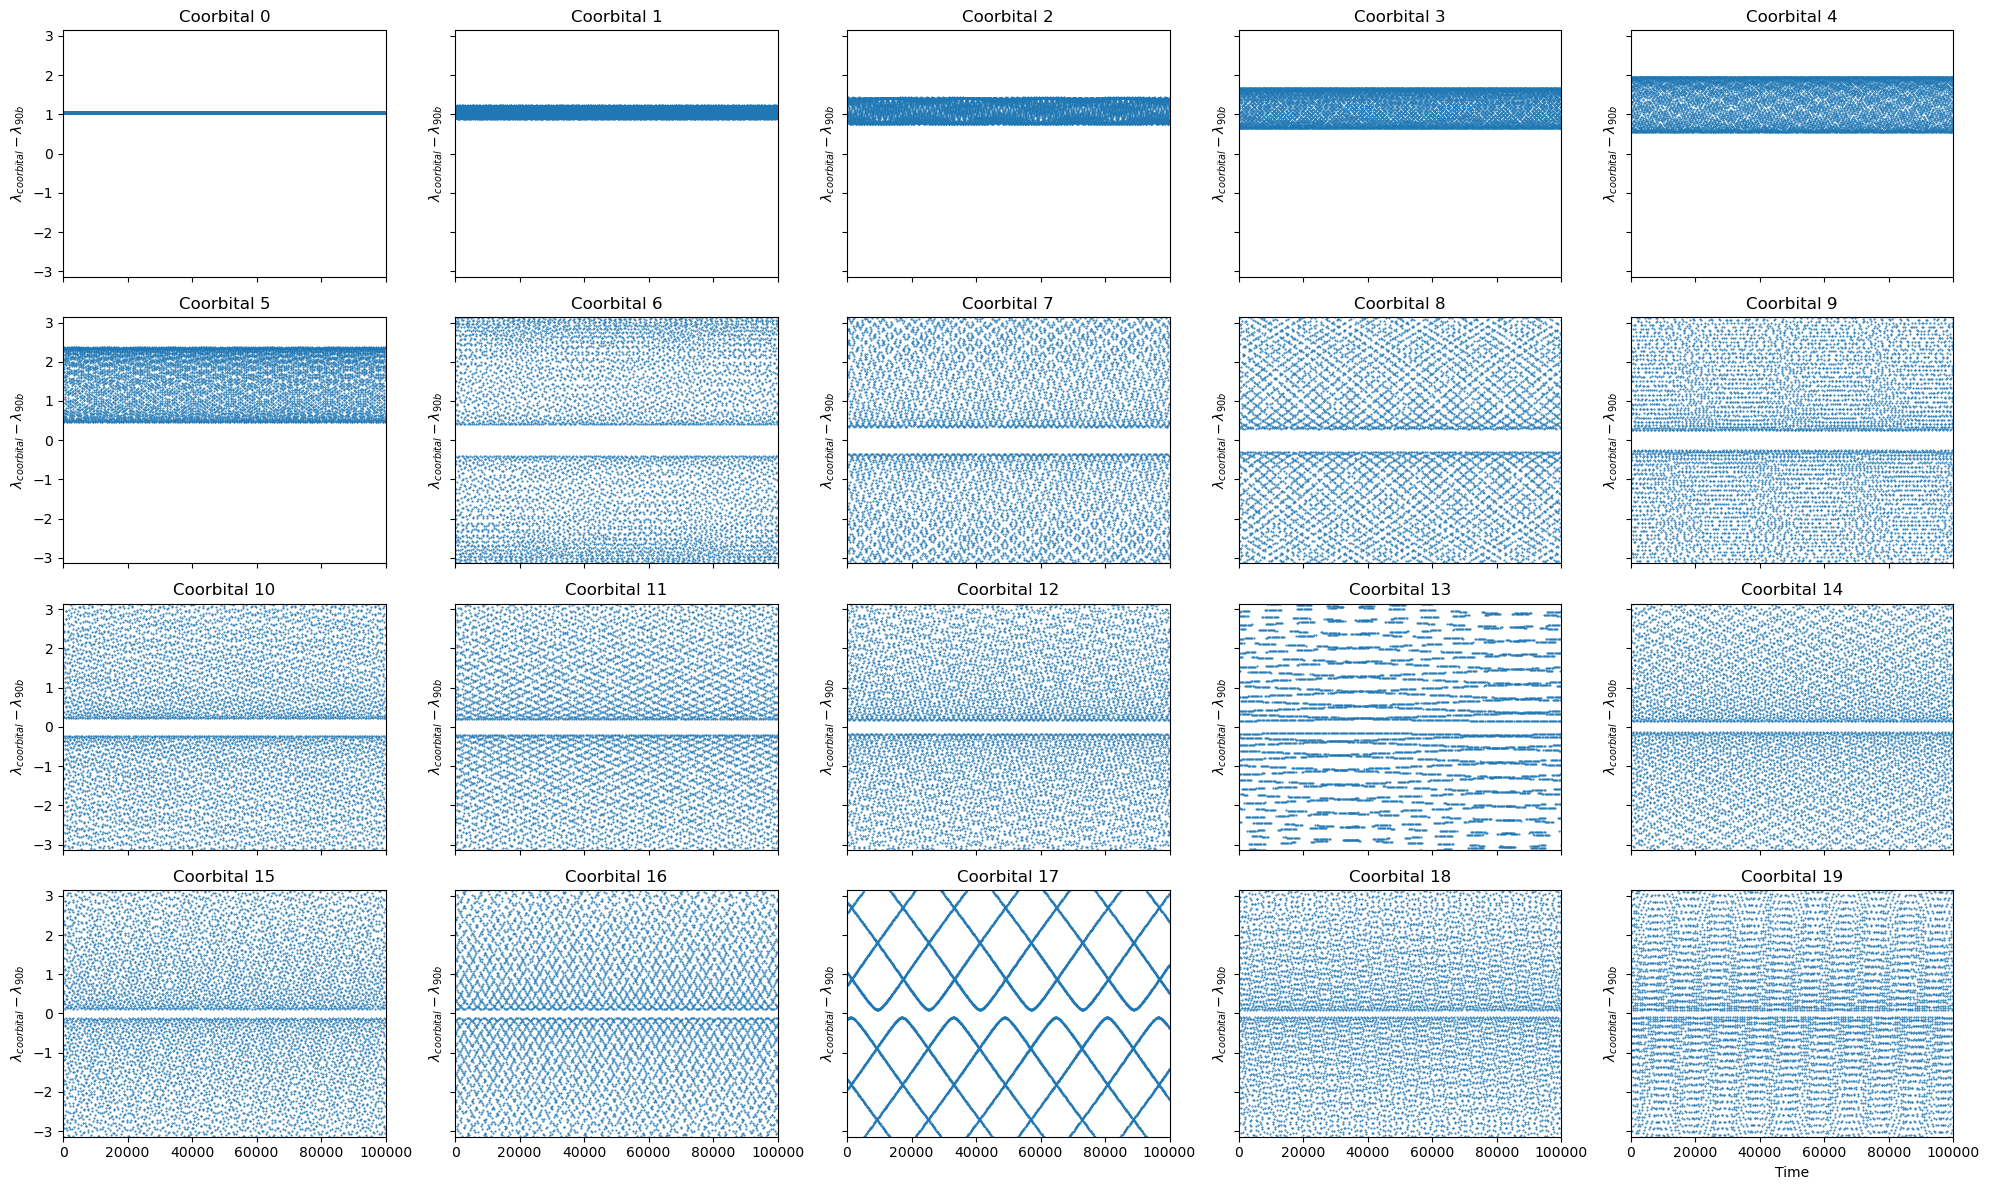

In [4]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_90b.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 9 (sun and planets)
    for j in range(2, 22):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of Kepler-90b (assumed to be the second particle, index 1)
    kepler_90b = sim.particles['Kepler-90b']
    kepler_90b_mean_longitude = kepler_90b.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_90b_mean_longitude
    mean_longitude_differences.append(differences)

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = tmax

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=.5, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{90b}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('90b_mean_long.png')

# Show the plot
plt.show()

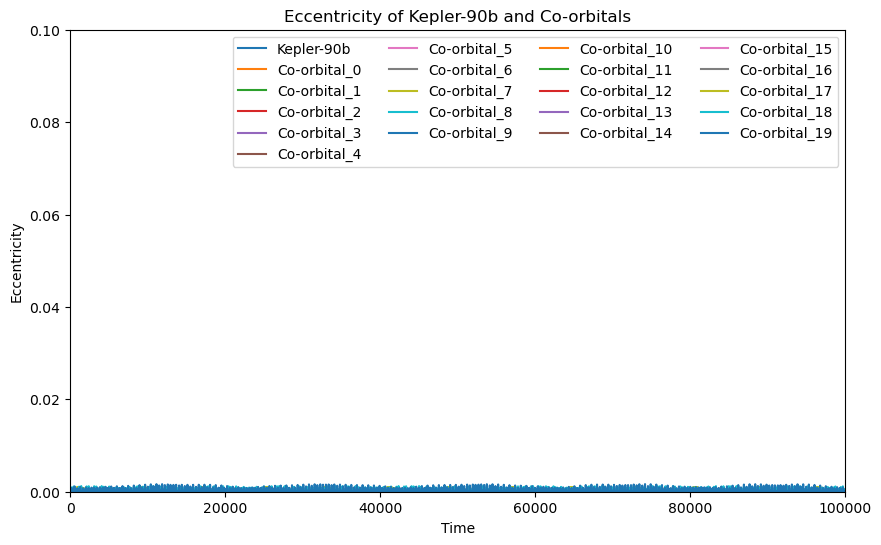

In [5]:
filenames = ["kepler_90b.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for Kepler-90b and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Plot eccentricity versus time for Kepler-90b and its co-orbitals
    eccentricities = np.array(eccentricities)
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities[:, 0], label='Kepler-90b')
    for j in range(1, 21):  # Indices representing co-orbitals
        plt.plot(times, eccentricities[:, j], label=f'Co-orbital_{j-1}')  # Label starts from Co-orbital_0
    plt.xlim(tmin, tmax)
    plt.ylim(emin, emax)
    plt.xlabel('Time')
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of Kepler-90b and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('90b_eccs.png')
    plt.show()

### Kepler-90c

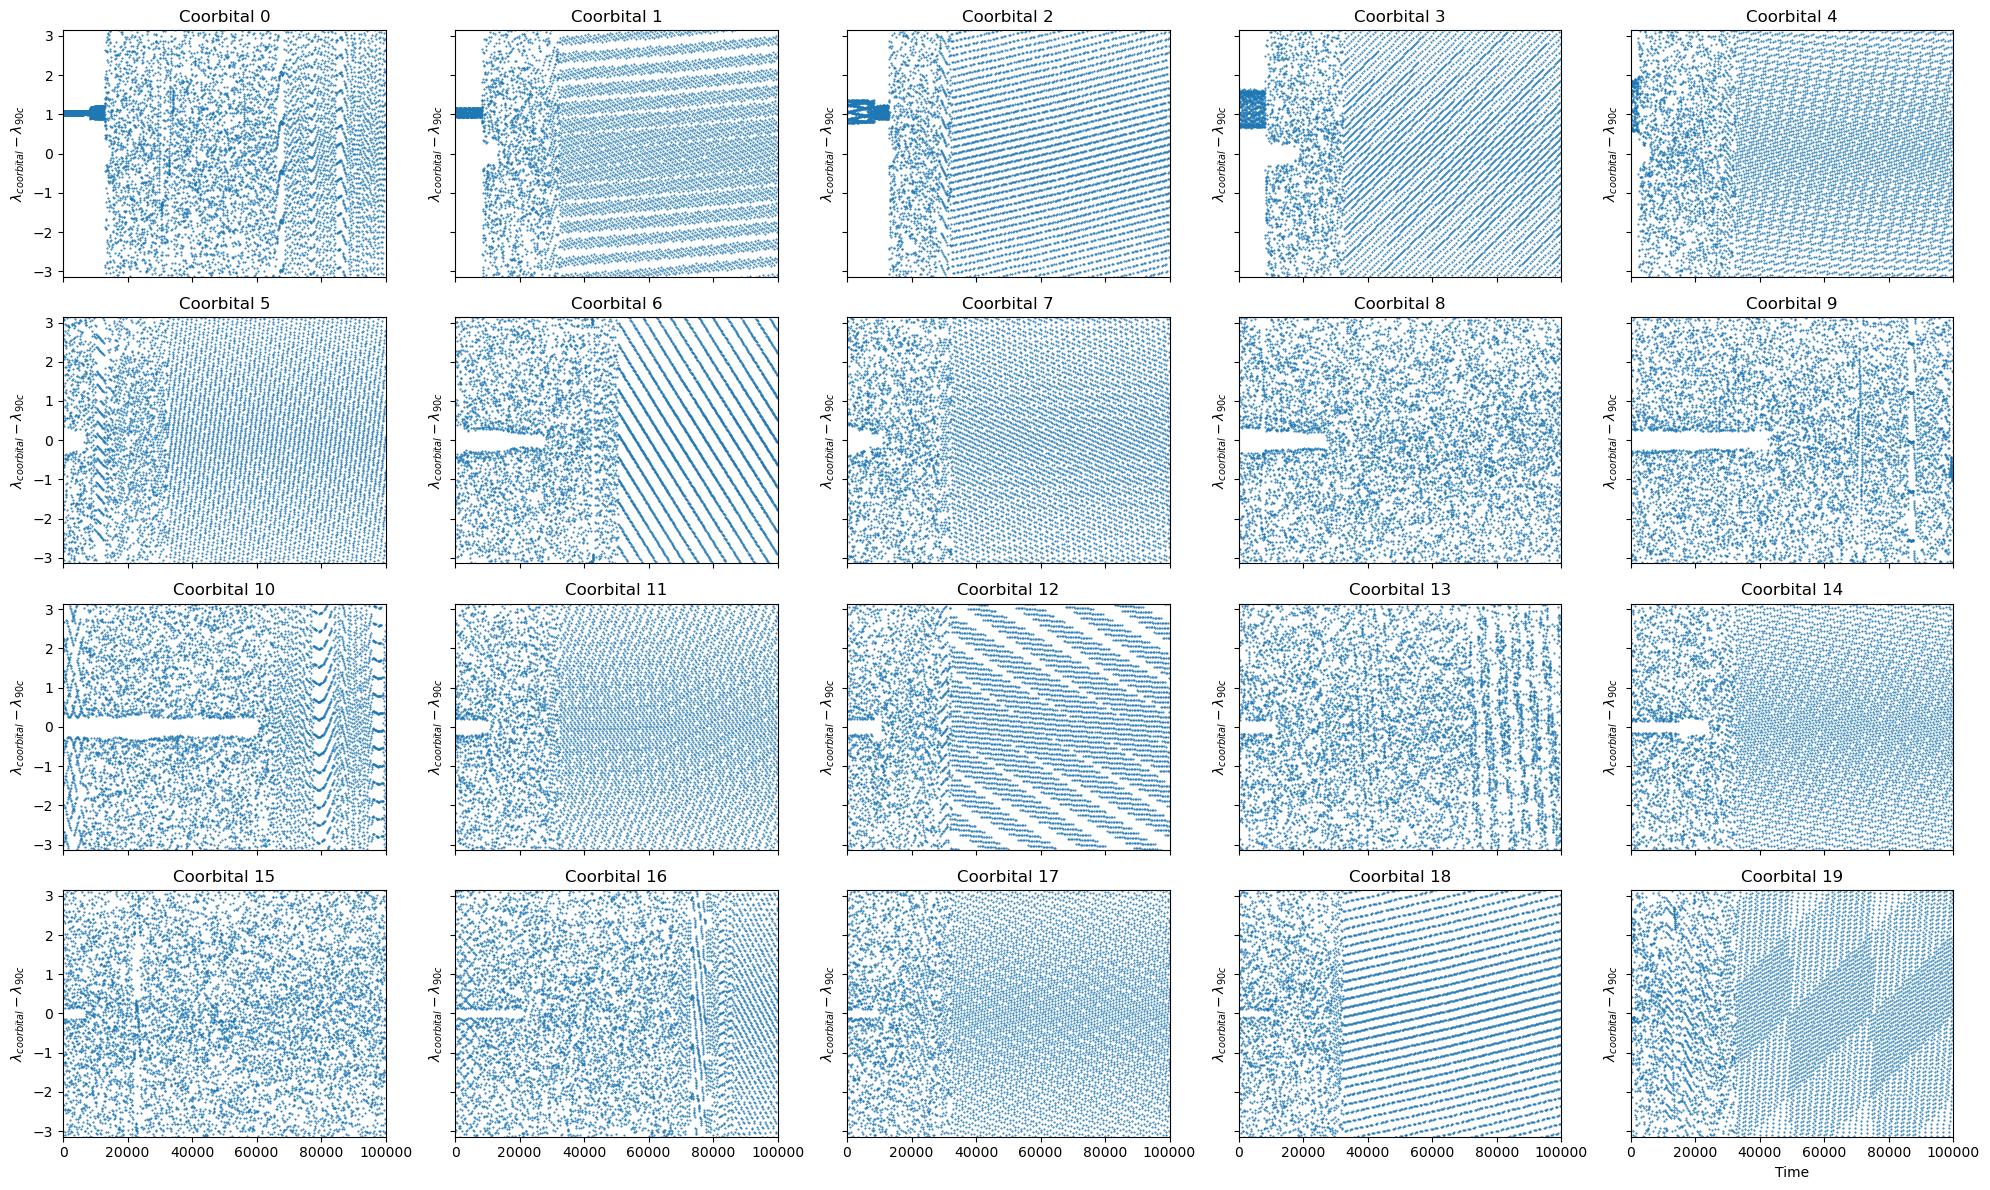

In [6]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_90c.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 9 (sun and planets)
    for j in range(3, 23):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of Kepler-90c (assumed to be the third particle, index 2)
    kepler_90c = sim.particles['Kepler-90c']
    kepler_90c_mean_longitude = kepler_90c.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_90c_mean_longitude
    mean_longitude_differences.append(differences)

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = tmax

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=.5, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{90c}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('90c_mean_long.png')

# Show the plot
plt.show()


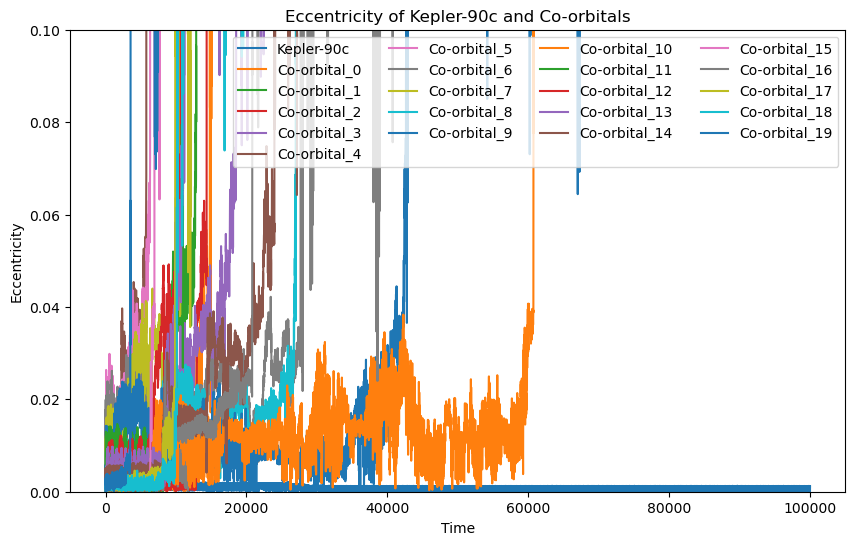

In [7]:
filenames = ["kepler_90c.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for Kepler-90c and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Plot eccentricity versus time for Kepler-90c and its co-orbitals
    eccentricities = np.array(eccentricities)
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities[:, 1], label='Kepler-90c')
    for j in range(2, 22):  # Indices representing co-orbitals
        plt.plot(times, eccentricities[:, j], label=f'Co-orbital_{j-2}')  # Label starts from Co-orbital_0
    plt.xlabel('Time')
    plt.ylim(emin, emax)
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of Kepler-90c and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('90c_eccs.png')
    plt.show()

### Kepler-90i

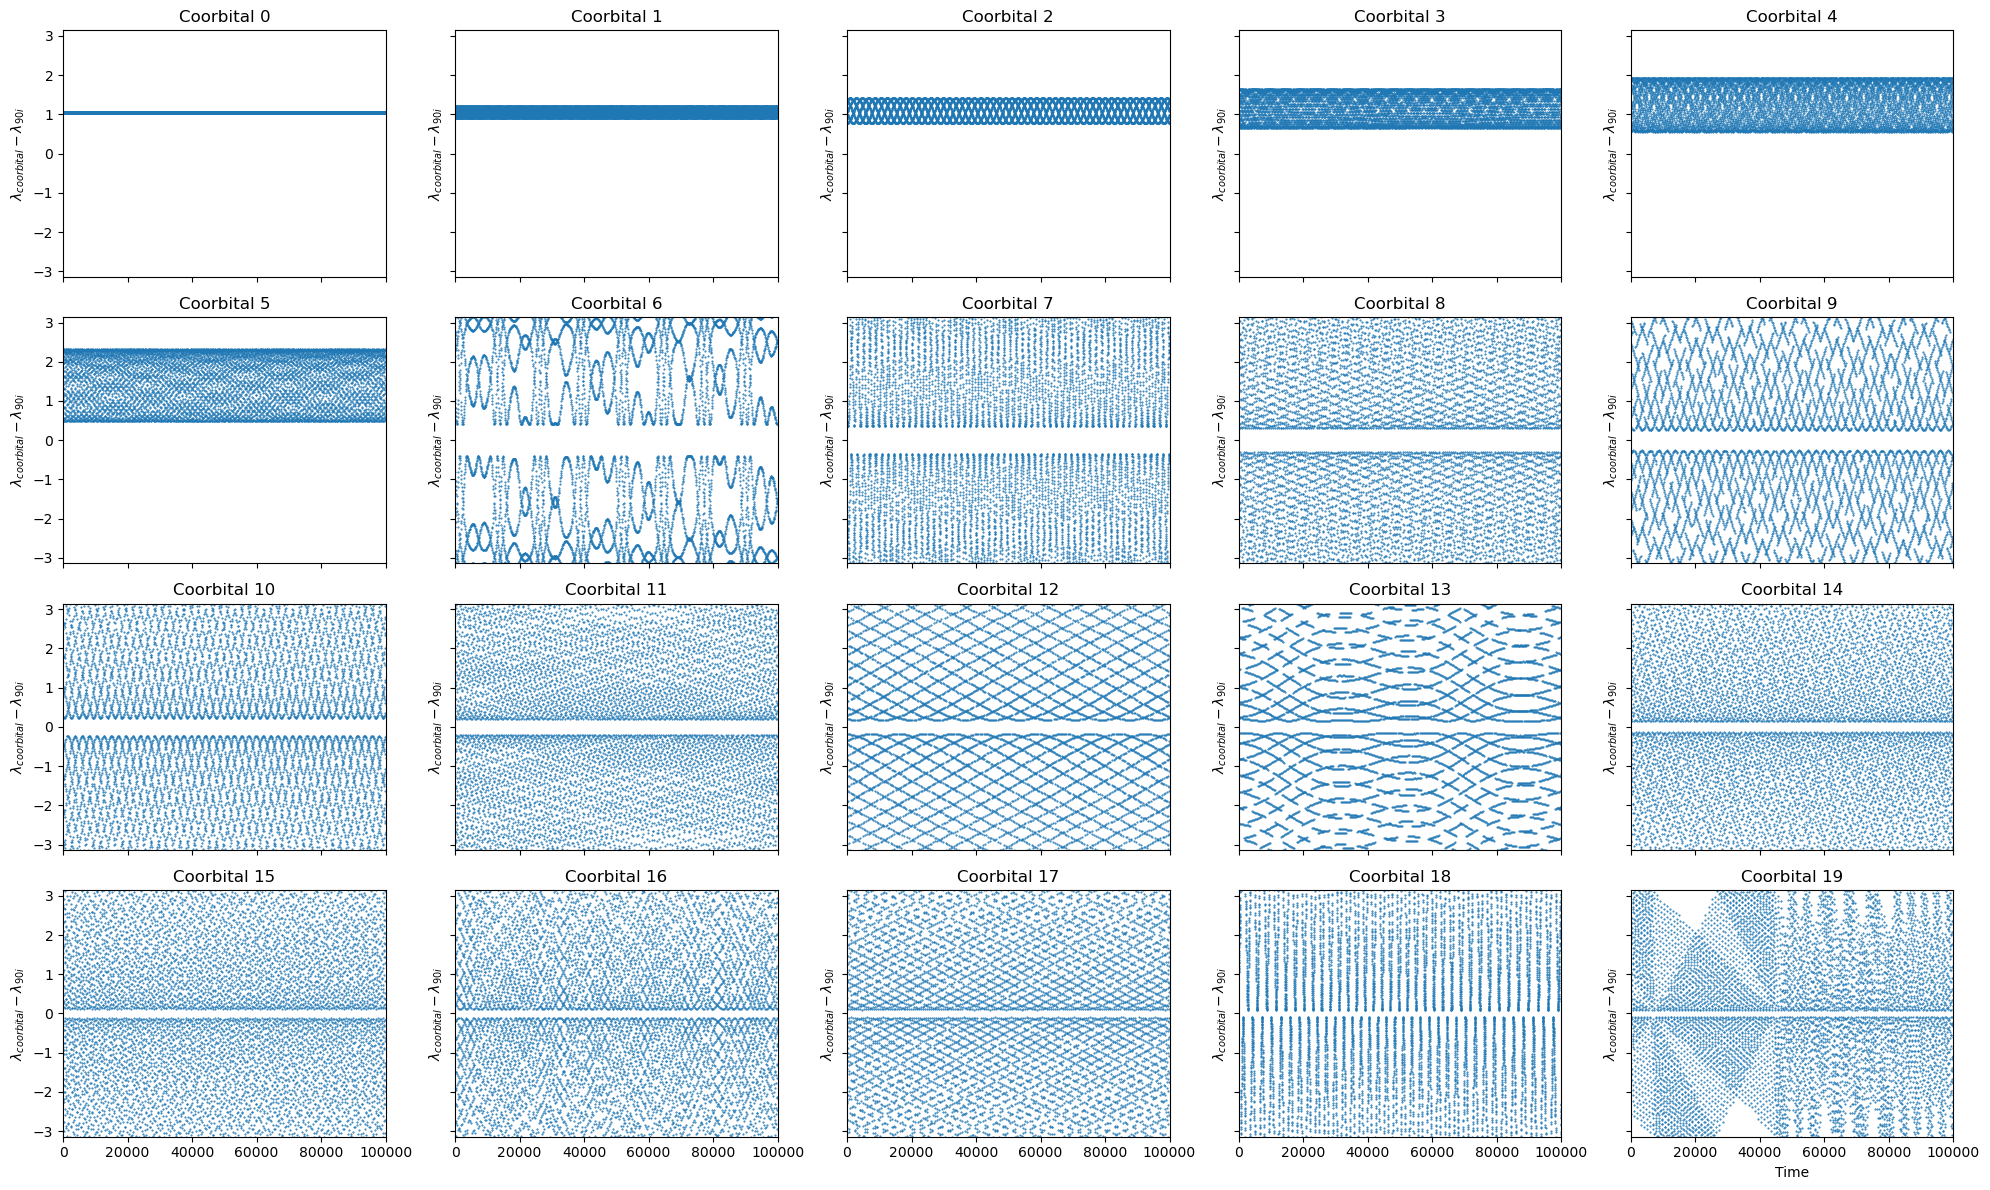

In [8]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_90i.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 9 (sun and planets)
    for j in range(4, 24):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of Kepler-90i (assumed to be the fourth particle, index 3)
    kepler_90i = sim.particles['Kepler-90i']
    kepler_90i_mean_longitude = kepler_90i.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_90i_mean_longitude
    mean_longitude_differences.append(differences)

# Determine the maximum number of particles across all snapshots
max_particles = max(len(d) for d in mean_longitude_differences)

# Pad arrays to ensure consistent length
mean_longitude_differences_padded = [np.pad(d, (0, max_particles - len(d)), 'constant', constant_values=np.nan) for d in mean_longitude_differences]

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences_padded)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = tmax

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=.5, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{90i}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('90i_mean_long.png')

# Show the plot
plt.show()

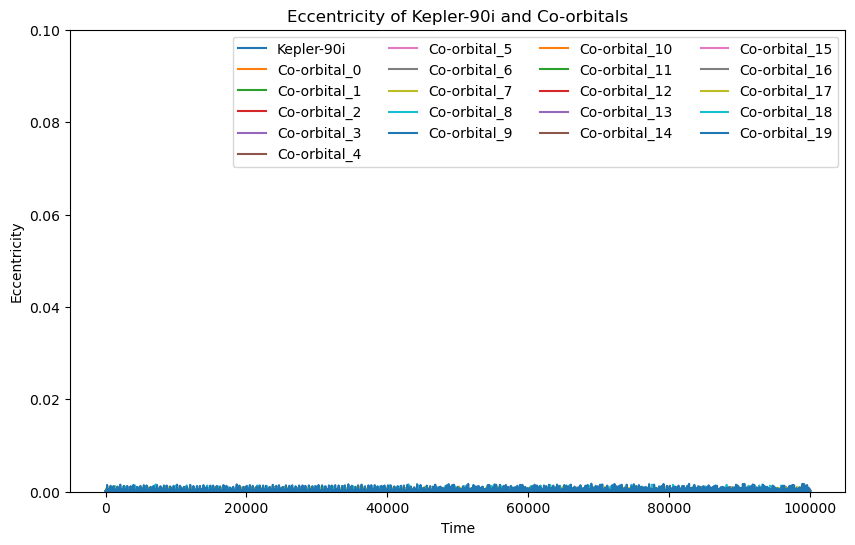

In [9]:
filenames = ["kepler_90i.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for Kepler-90i and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Find the maximum number of orbital elements in any snapshot
    max_len = max(len(ecc) for ecc in eccentricities)

    # Pad eccentricity lists with NaN to make them all the same length
    eccentricities_padded = np.array([ecc + [np.nan]*(max_len - len(ecc)) for ecc in eccentricities])

    # Plot eccentricity versus time for Kepler-90i and its co-orbitals
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities_padded[:, 2], label='Kepler-90i')
    for j in range(3, 23):  # Indices 7-26 represent co-orbitals
        plt.plot(times, eccentricities_padded[:, j], label=f'Co-orbital_{j-3}')  # Label starts from Co-orbital_0
    plt.xlabel('Time')
    plt.ylim(emin, emax)
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of Kepler-90i and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('90i_eccs.png')
    plt.show()

### Kepler-90d

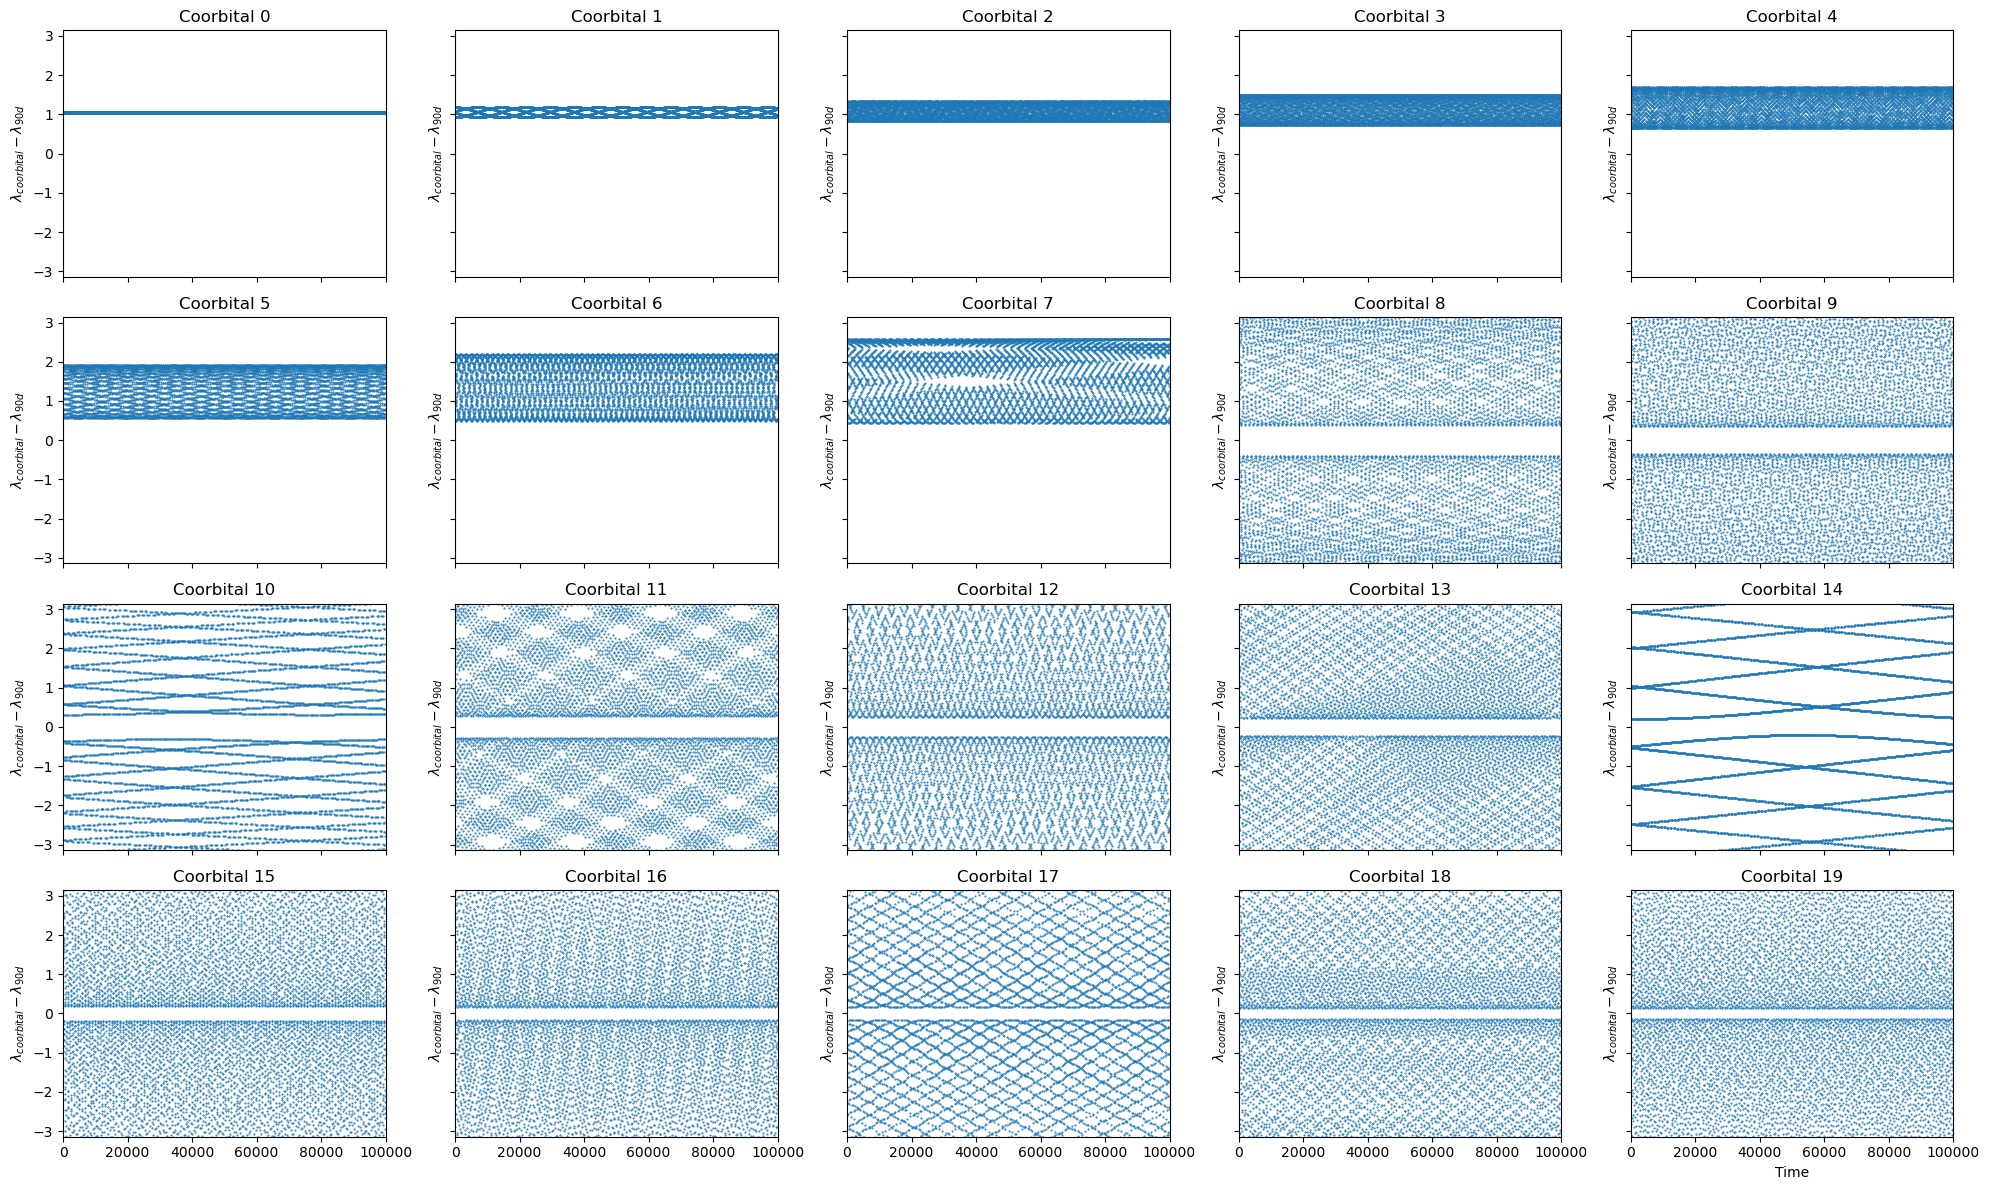

In [10]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_90d.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 9 (sun and planets)
    for j in range(5, 25):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of Kepler-90d (assumed to be the fifth particle, index 4)
    kepler_90d = sim.particles['Kepler-90d']
    kepler_90d_mean_longitude = kepler_90d.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_90d_mean_longitude
    mean_longitude_differences.append(differences)

# Determine the maximum number of particles across all snapshots
max_particles = max(len(d) for d in mean_longitude_differences)

# Pad arrays to ensure consistent length
mean_longitude_differences_padded = [np.pad(d, (0, max_particles - len(d)), 'constant', constant_values=np.nan) for d in mean_longitude_differences]

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences_padded)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = tmax

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=.5, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{90d}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('90d_mean_long.png')

# Show the plot
plt.show()

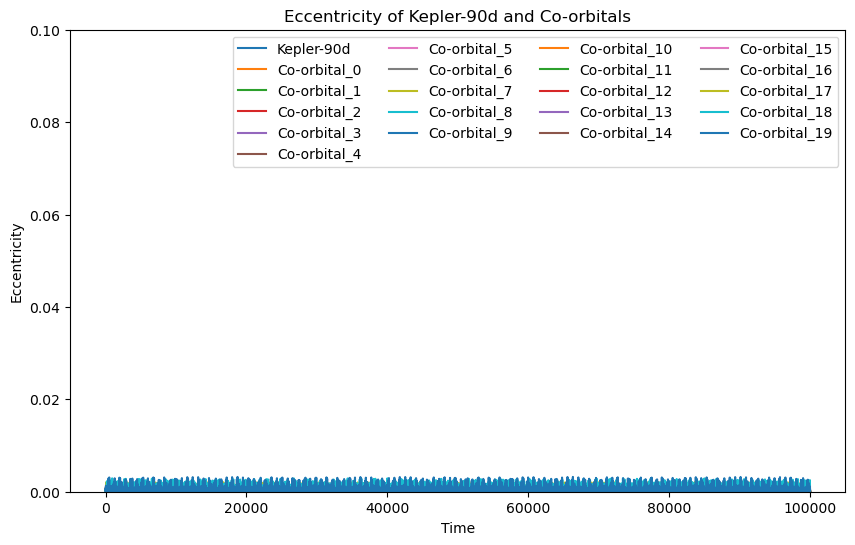

In [11]:
filenames = ["kepler_90d.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for Kepler-90d and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Find the maximum number of orbital elements in any snapshot
    max_len = max(len(ecc) for ecc in eccentricities)

    # Pad eccentricity lists with NaN to make them all the same length
    eccentricities_padded = np.array([ecc + [np.nan]*(max_len - len(ecc)) for ecc in eccentricities])

    # Plot eccentricity versus time for Kepler-90d and its co-orbitals
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities_padded[:, 3], label='Kepler-90d')
    for j in range(4, 24):  # Indices 7-26 represent co-orbitals
        plt.plot(times, eccentricities_padded[:, j], label=f'Co-orbital_{j-4}')  # Label starts from Co-orbital_1
    plt.xlabel('Time')
    plt.ylim(emin, emax)
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of Kepler-90d and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('90d_eccs.png')
    plt.show()

### Kepler-90e

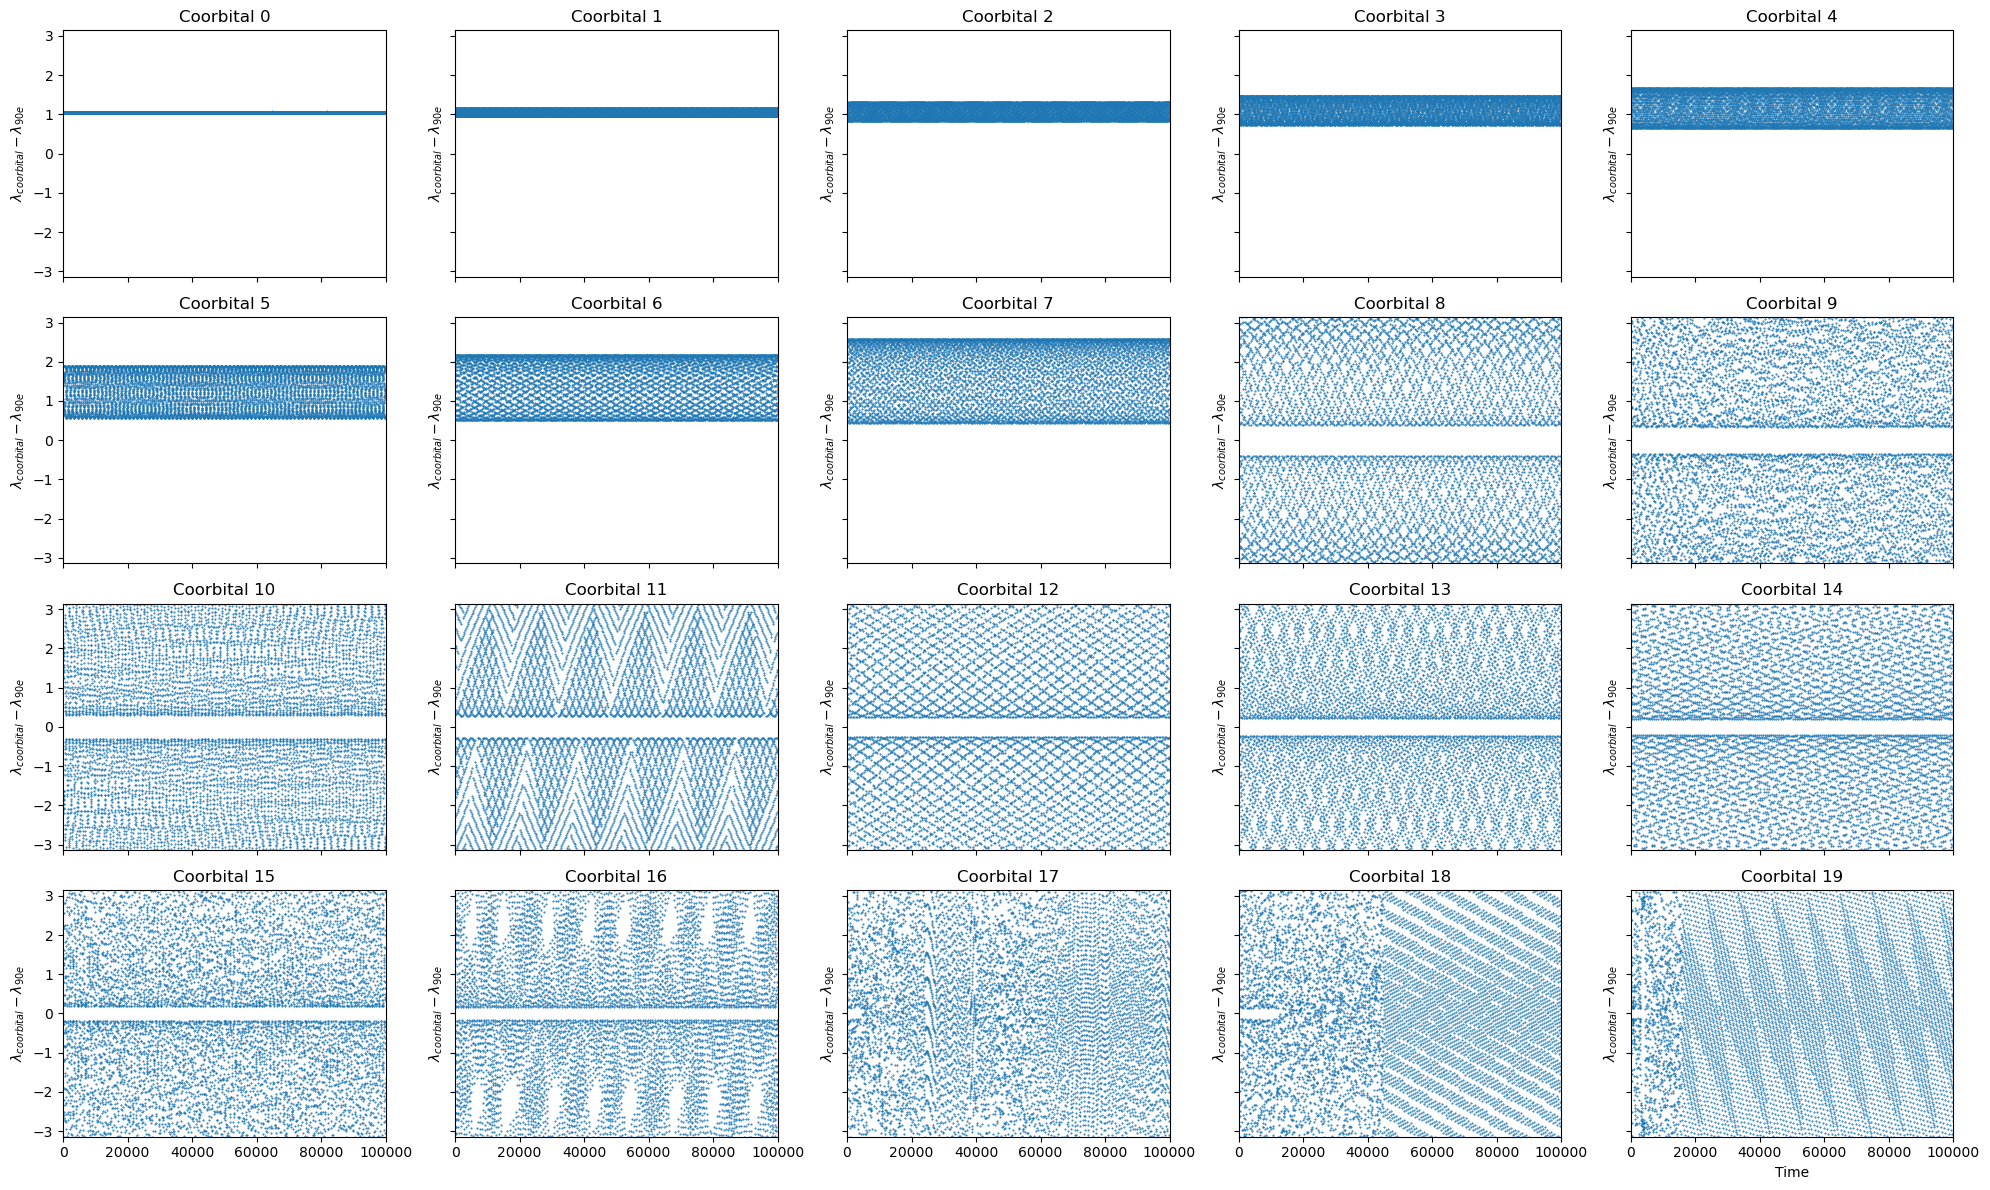

In [12]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_90e.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 9 (sun and planets)
    for j in range(6, 26):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of Kepler-90e (assumed to be the sixth particle, index 5)
    kepler_90e = sim.particles['Kepler-90e']
    kepler_90e_mean_longitude = kepler_90e.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_90e_mean_longitude
    mean_longitude_differences.append(differences)

# Determine the maximum number of particles across all snapshots
max_particles = max(len(d) for d in mean_longitude_differences)

# Pad arrays to ensure consistent length
mean_longitude_differences_padded = [np.pad(d, (0, max_particles - len(d)), 'constant', constant_values=np.nan) for d in mean_longitude_differences]

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences_padded)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = tmax

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=.5, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{90e}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('90e_mean_long.png')

# Show the plot
plt.show()

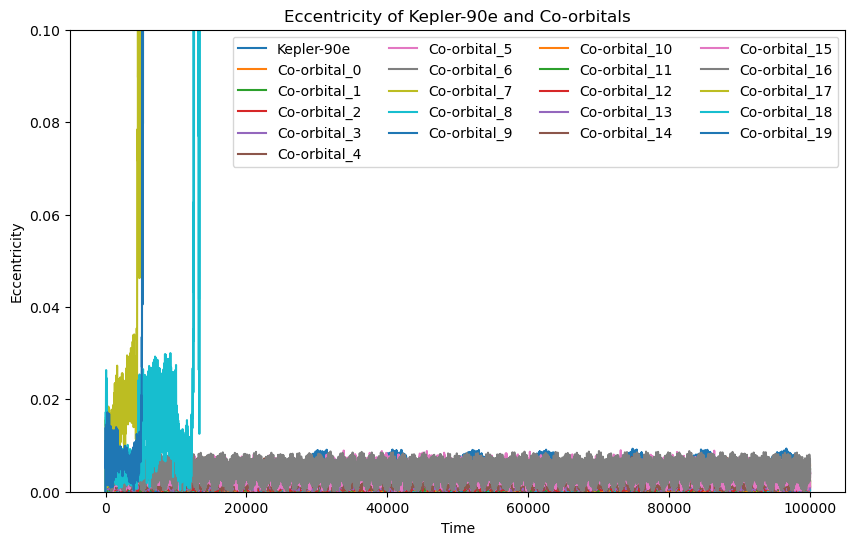

In [13]:
filenames = ["kepler_90e.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for Kepler-90e and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Find the maximum number of orbital elements in any snapshot
    max_len = max(len(ecc) for ecc in eccentricities)

    # Pad eccentricity lists with NaN to make them all the same length
    eccentricities_padded = np.array([ecc + [np.nan]*(max_len - len(ecc)) for ecc in eccentricities])

    # Plot eccentricity versus time for Kepler-90e and its co-orbitals
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities_padded[:, 4], label='Kepler-90e')
    for j in range(5, 25):  # Indices 7-26 represent co-orbitals
        plt.plot(times, eccentricities_padded[:, j], label=f'Co-orbital_{j-5}')  # Label starts from Co-orbital_1
    plt.xlabel('Time')
    plt.ylim(emin, emax)
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of Kepler-90e and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('90e_eccs.png')
    plt.show()

### Kepler-90f

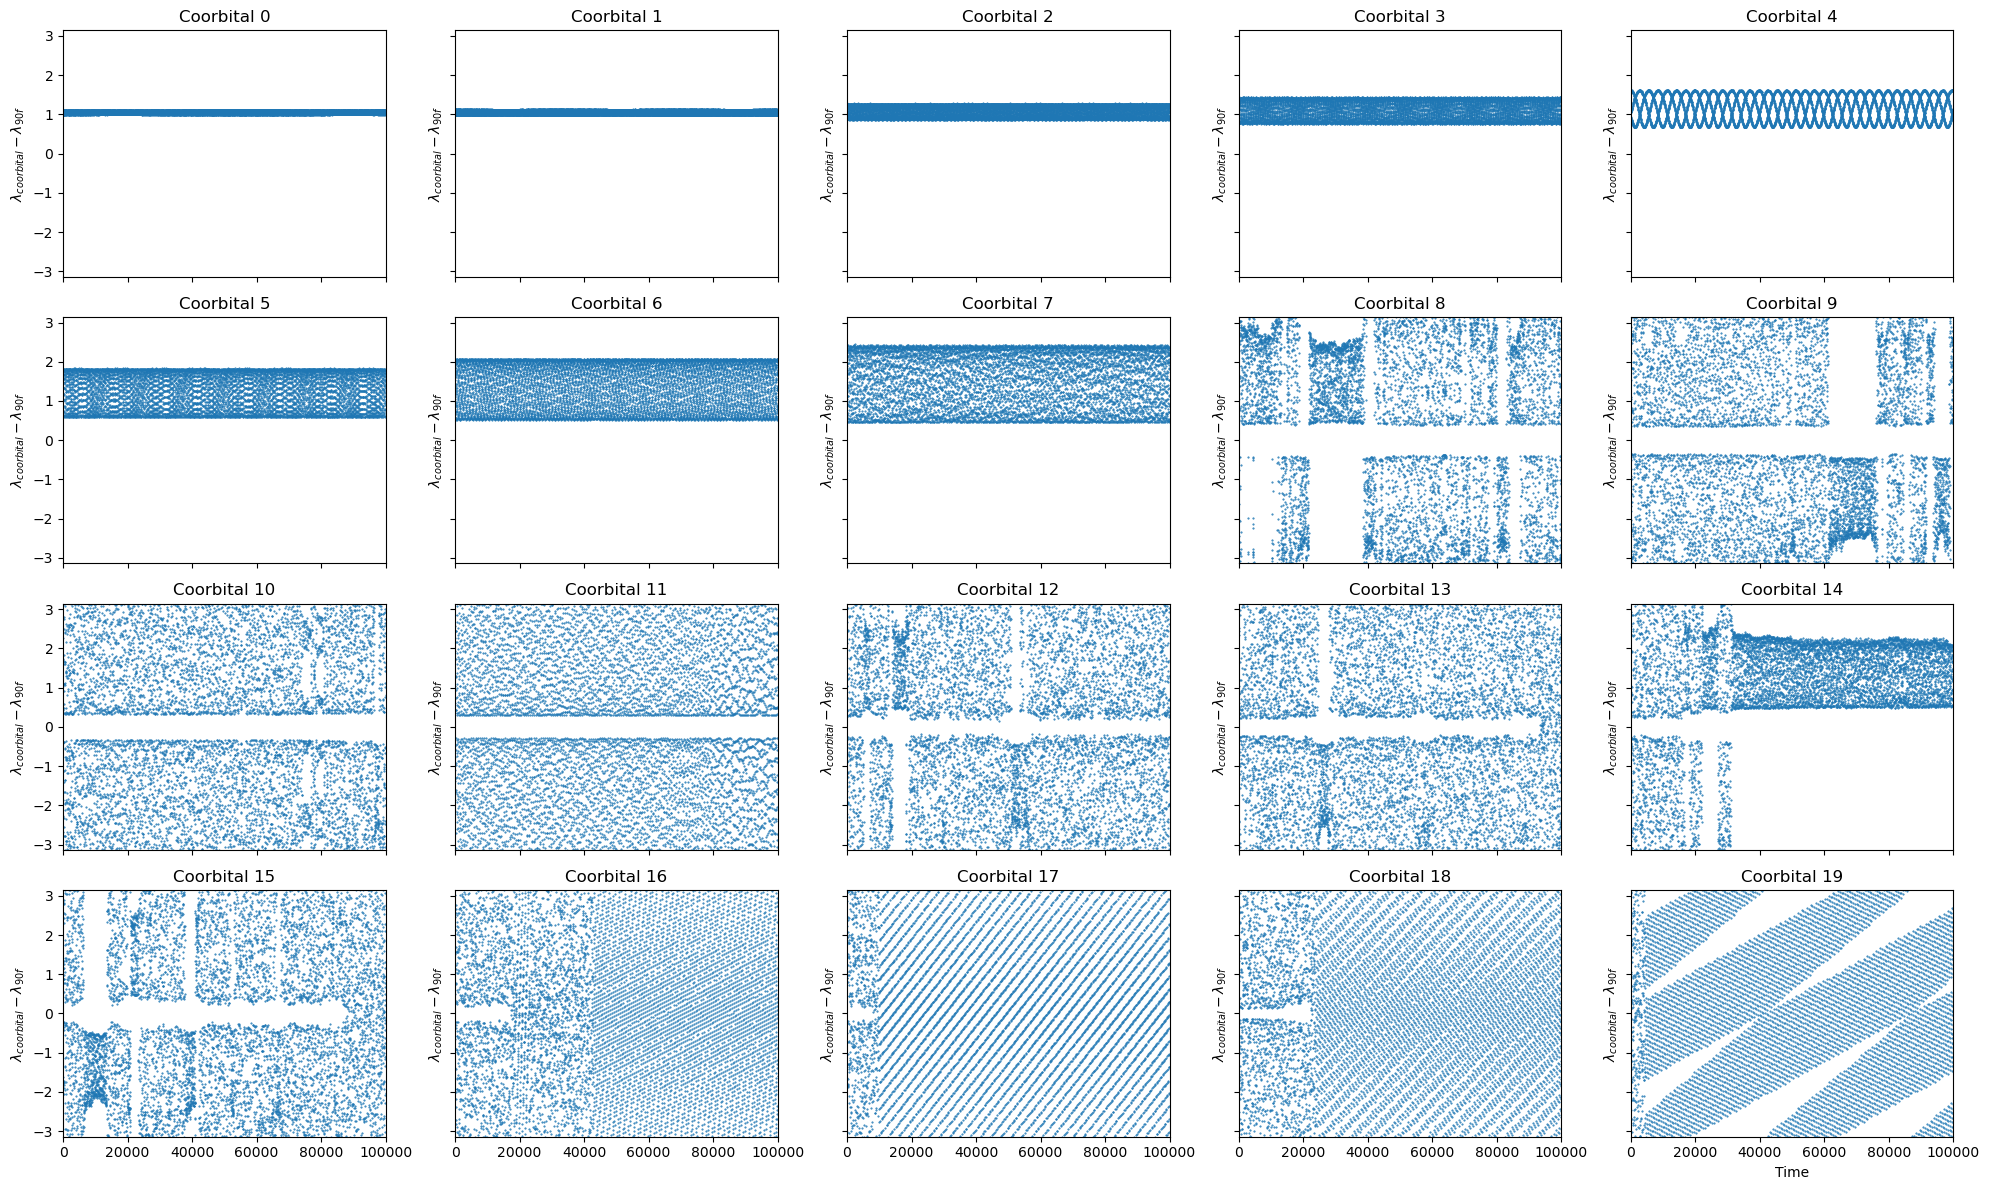

In [14]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_90f.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 9 (sun and planets)
    for j in range(7, 27):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of Kepler-90f (assumed to be the second particle, index 1)
    kepler_90f = sim.particles['Kepler-90f']
    kepler_90f_mean_longitude = kepler_90f.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_90f_mean_longitude
    mean_longitude_differences.append(differences)

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = tmax

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=.5, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{90f}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('90f_mean_long.png')

# Show the plot
plt.show()

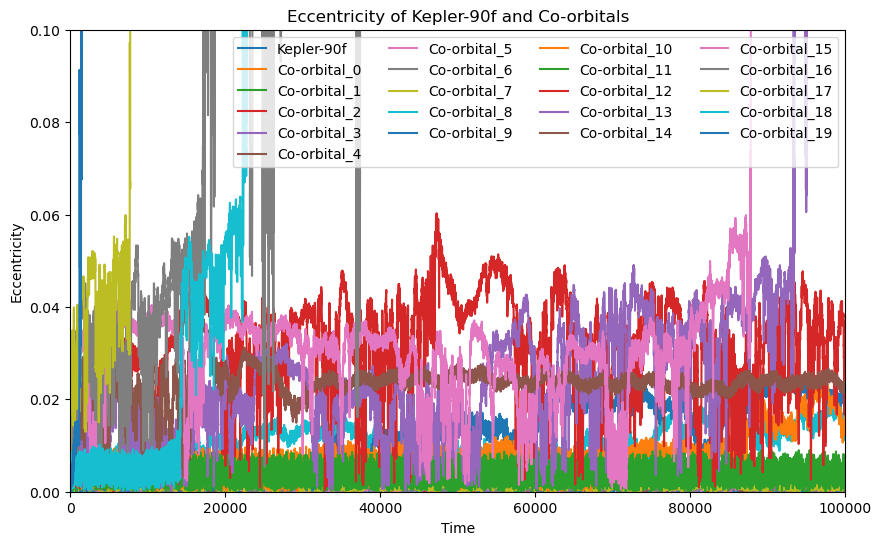

In [15]:
filenames = ["kepler_90f.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for Kepler-90f and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Plot eccentricity versus time for Kepler-90f and its co-orbitals
    eccentricities = np.array(eccentricities)
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities[:, 5], label='Kepler-90f')
    for j in range(6, 26):  # Indices representing co-orbitals
        plt.plot(times, eccentricities[:, j], label=f'Co-orbital_{j-6}')  # Label starts from Co-orbital_0
    plt.xlim(tmin, tmax)
    plt.ylim(emin, emax)
    plt.xlabel('Time')
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of Kepler-90f and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('90f_eccs.png')
    plt.show()

### Kepler-90g

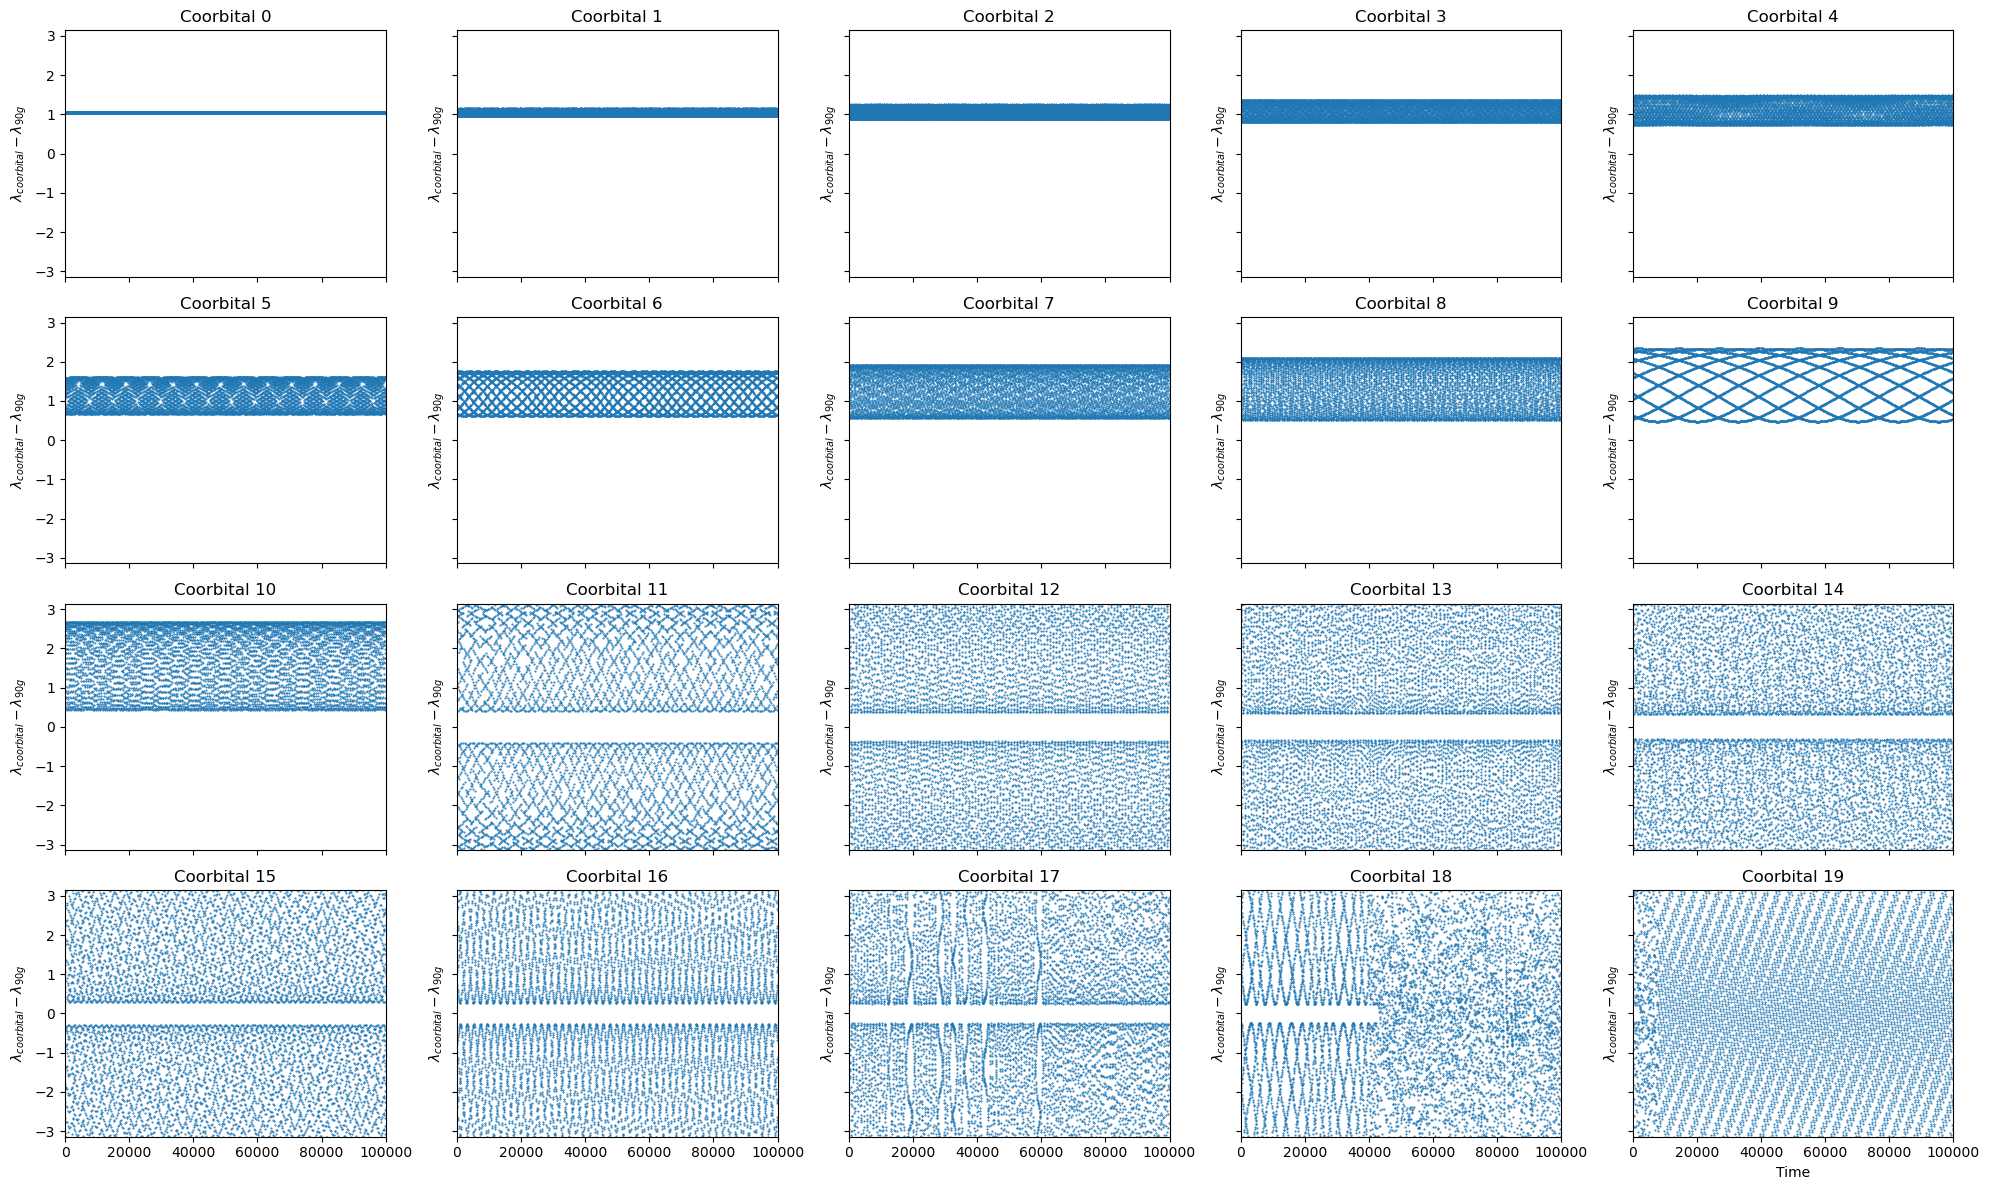

In [16]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_90g.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 9 (sun and planets)
    for j in range(8, 28):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of Kepler-90g (assumed to be the second particle, index 1)
    kepler_90g = sim.particles['Kepler-90g']
    kepler_90g_mean_longitude = kepler_90g.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_90g_mean_longitude
    mean_longitude_differences.append(differences)

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = tmax

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=.5, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{90g}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('90g_mean_long.png')

# Show the plot
plt.show()

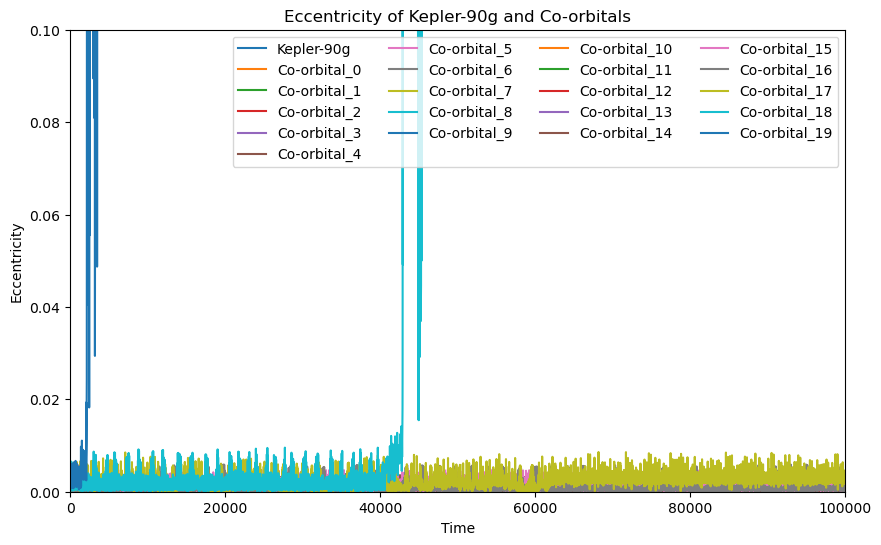

In [17]:
filenames = ["kepler_90g.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for Kepler-90g and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Plot eccentricity versus time for Kepler-90g and its co-orbitals
    eccentricities = np.array(eccentricities)
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities[:, 6], label='Kepler-90g')
    for j in range(7, 27):  # Indices representing co-orbitals
        plt.plot(times, eccentricities[:, j], label=f'Co-orbital_{j-7}')  # Label starts from Co-orbital_0
    plt.xlim(tmin, tmax)
    plt.ylim(emin, emax)
    plt.xlabel('Time')
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of Kepler-90g and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('90g_eccs.png')
    plt.show()

### Kepler-90h

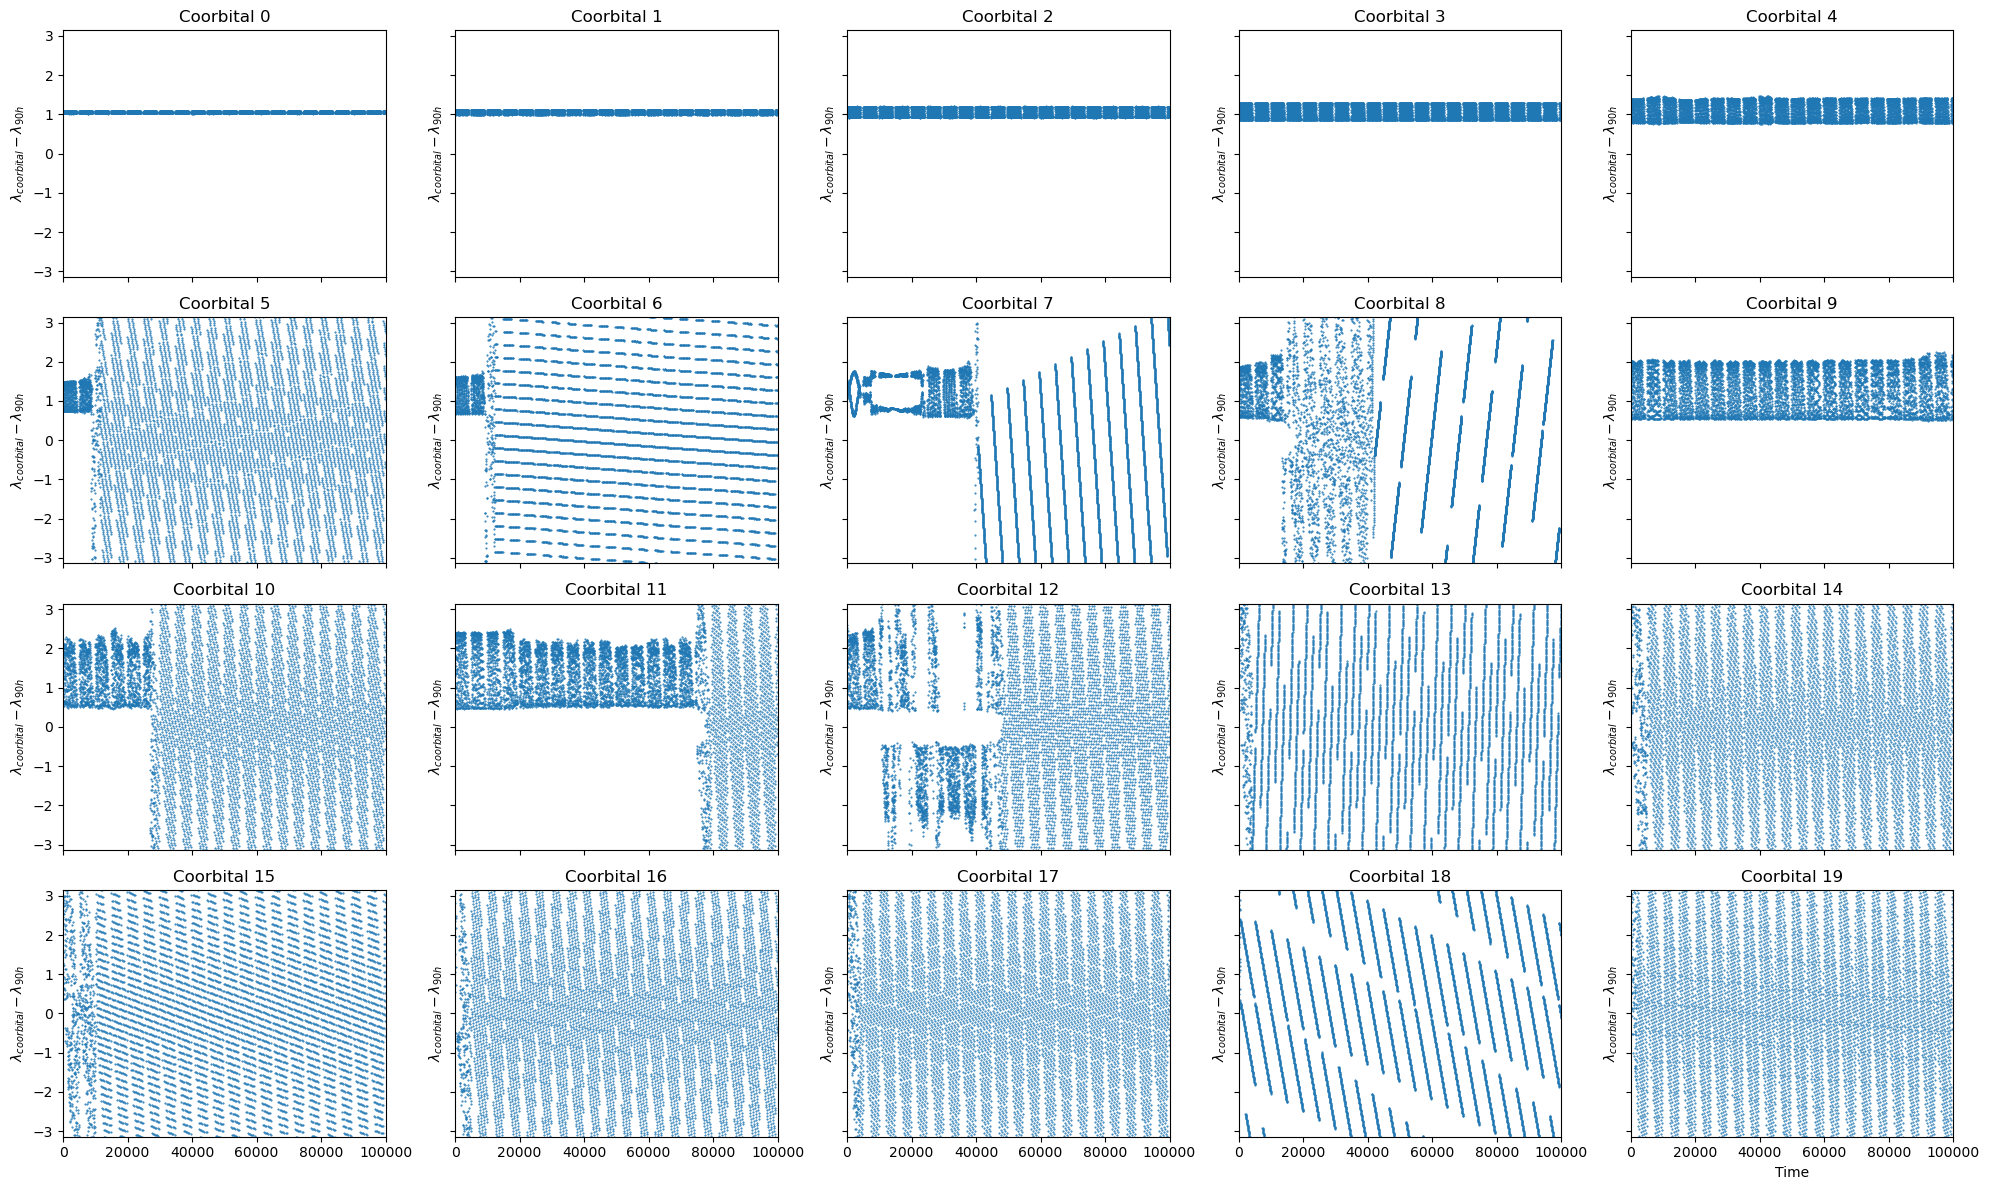

In [18]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_90h.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 9 (sun and planets)
    for j in range(9, 29):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of Kepler-90h (assumed to be the second particle, index 1)
    kepler_90h = sim.particles['Kepler-90h']
    kepler_90h_mean_longitude = kepler_90h.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_90h_mean_longitude
    mean_longitude_differences.append(differences)

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = tmax

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=.5, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{90h}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('90h_mean_long.png')

# Show the plot
plt.show()

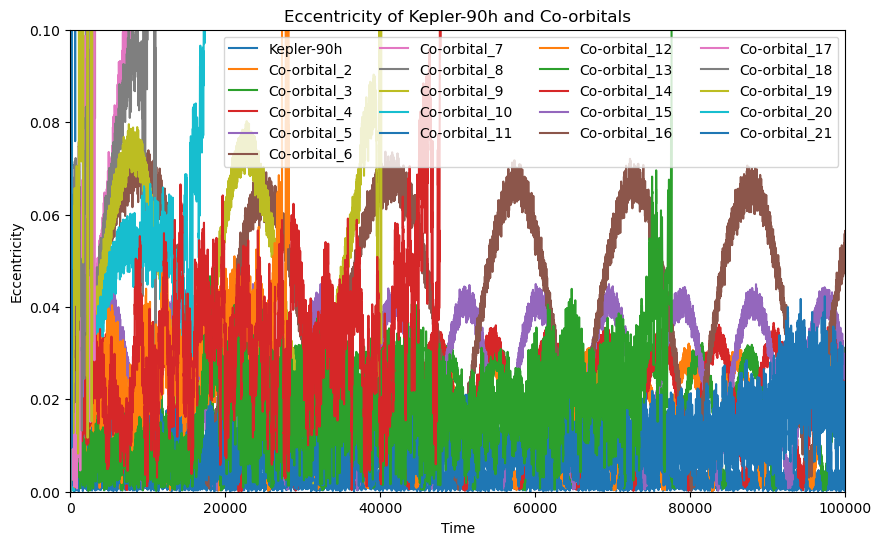

In [19]:
filenames = ["kepler_90h.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for Kepler-90h and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Plot eccentricity versus time for Kepler-90h and its co-orbitals
    eccentricities = np.array(eccentricities)
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities[:, 7], label='Kepler-90h')
    for j in range(8, 28):  # Indices 7-26 represent co-orbitals
        plt.plot(times, eccentricities[:, j], label=f'Co-orbital_{j-6}')  # Label starts from Co-orbital_1
    plt.xlim(tmin, tmax)
    plt.ylim(emin, emax)
    plt.xlabel('Time')
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of Kepler-90h and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('90h_eccs.png')
    plt.show()